In [2]:
import numpy as np
import pandas as pd 
import os

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras.preprocessing.image import img_to_array

In [4]:
data='/home/piyush/NeuralNetwork/datasets/plant disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_data=data+'/train'
diseases = os.listdir(train_data)

In [5]:
print(len(diseases))

38


In [6]:
#separating plant names and disease names
'''plant=[]
condition=[]
for i in diseases:
    plant.append((i.split('___'))[0])
    condition.append((i.split('___'))[1])'''

"plant=[]\ncondition=[]\nfor i in diseases:\n    plant.append((i.split('___'))[0])\n    condition.append((i.split('___'))[1])"

In [7]:
#plant

In [8]:
#condition

In [9]:
#removing duplicates
#plant=list(dict.fromkeys(plant))
#condition=list(dict.fromkeys(condition))

In [10]:
#plant

In [11]:
#condition

In [12]:
import pathlib
data_dir=pathlib.Path(train_data)

In [13]:
dict={}
for i in diseases:
    dict[i]=(list(data_dir.glob(i+'/*')))

In [14]:
k=int(0)
labels={}
for i in diseases:
    labels[i]=k
    k=k+1
print(labels)

{'Peach___Bacterial_spot': 0, 'Soybean___healthy': 1, 'Potato___Early_blight': 2, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 3, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4, 'Tomato___Leaf_Mold': 5, 'Apple___healthy': 6, 'Orange___Haunglongbing_(Citrus_greening)': 7, 'Strawberry___Leaf_scorch': 8, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 9, 'Corn_(maize)___Common_rust_': 10, 'Apple___Apple_scab': 11, 'Potato___Late_blight': 12, 'Tomato___Tomato_mosaic_virus': 13, 'Corn_(maize)___healthy': 14, 'Blueberry___healthy': 15, 'Squash___Powdery_mildew': 16, 'Corn_(maize)___Northern_Leaf_Blight': 17, 'Tomato___Early_blight': 18, 'Tomato___Bacterial_spot': 19, 'Pepper,_bell___healthy': 20, 'Apple___Cedar_apple_rust': 21, 'Pepper,_bell___Bacterial_spot': 22, 'Grape___Black_rot': 23, 'Tomato___healthy': 24, 'Grape___healthy': 25, 'Cherry_(including_sour)___healthy': 26, 'Tomato___Septoria_leaf_spot': 27, 'Apple___Black_rot': 28, 'Tomato___Spider_mites Two-spotted_spider_mite': 29, '

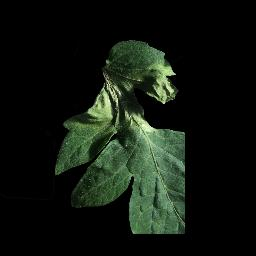

In [15]:
PIL.Image.open(str(list(data_dir.glob('Tomato___Late_blight/*'))[0]))

In [16]:
import cv2
#img=cv2.imread(str(dict['Tomato___Late_blight'][0]))
#img.shape

In [17]:
y=[]
x=[]
for name,images in dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resize=cv2.resize(img,(180,180))
        x.append(resize)
        y.append(labels[name])
y[:5]

[0, 0, 0, 0, 0]

In [18]:
x[0]


array([[[146, 147, 143],
        [144, 145, 141],
        [148, 149, 145],
        ...,
        [121, 124, 122],
        [130, 133, 130],
        [131, 134, 132]],

       [[148, 149, 145],
        [145, 146, 142],
        [148, 149, 145],
        ...,
        [124, 128, 126],
        [128, 131, 129],
        [125, 128, 126]],

       [[146, 147, 143],
        [144, 146, 141],
        [148, 149, 145],
        ...,
        [116, 119, 117],
        [121, 124, 122],
        [124, 127, 125]],

       ...,

       [[150, 157, 150],
        [152, 159, 153],
        [155, 161, 156],
        ...,
        [ 97, 102, 101],
        [105, 110, 109],
        [ 94,  98,  97]],

       [[154, 161, 154],
        [154, 161, 155],
        [156, 162, 157],
        ...,
        [100, 105, 104],
        [109, 115, 113],
        [ 91,  95,  95]],

       [[157, 164, 157],
        [157, 164, 158],
        [157, 163, 158],
        ...,
        [103, 108, 107],
        [105, 110, 109],
        [ 95, 100,  99]]

In [20]:
#converting to numpy array
scalex=np.array(x)
scaley=np.array(y)

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(x,y,random_state=0)'''

In [ ]:
scalex=scalex/255
scaley=scaley/255

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num=38
model=Sequential([
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dropout(0.05),
    layers.Dense(num)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(scalex, scaley, epochs=10)

In [25]:
data1='../input/new-plant-diseases-dataset/test'
test_data=data1+'/test'
test_data = os.listdir(test_data)
test_data

FileNotFoundError: [Errno 2] No such file or directory: '../input/new-plant-diseases-dataset/test/test'

In [26]:
#../input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG
x_test=[]
dire='../input/new-plant-diseases-dataset/test/test/'
for i in test_data:
    string=dire+i
    img=cv2.imread(os.path.abspath(string))
    resize=cv2.resize(img,(180,180))
    x_test.append(resize)

error: OpenCV(4.5.2) /tmp/pip-req-build-eirhwqtr/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [27]:
x_test[0]

IndexError: list index out of range

In [28]:
x_test=np.array(x_test)/255

In [29]:
predicts=model.predict(x_test)
predicts[1]

ValueError: Expect x to be a non-empty array or dataset.

In [30]:
np.argmax(predicts[1])

NameError: name 'predicts' is not defined